In [3]:
import pandas as pd

df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

print(df.dtypes)

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [4]:
missing_values = df.isnull().sum()


total_missing = missing_values.sum()


print("Missing Values:")
print(missing_values)
print("\nTotal Missing Values:", total_missing)

Missing Values:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole      

In [5]:
print(df.shape)


(1470, 35)


In [6]:
print(df.describe())


               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

In [7]:
print(df.head())


   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [8]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

negative_values = (df[numeric_columns] < 0).sum()

negative_values = negative_values[negative_values > 0]


if negative_values.empty:
    print("no negative values found in numeric columns.")
else:
    print("Negative Values:")
    # Display the columns with negative values
    print("Columns with negative values:")
    print(negative_values)


no negative values found in numeric columns.


/var/folders/st/fk1vq_zx1yx9fqx2l_llr7z80000gn/T/ipykernel_10530/2545104721.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


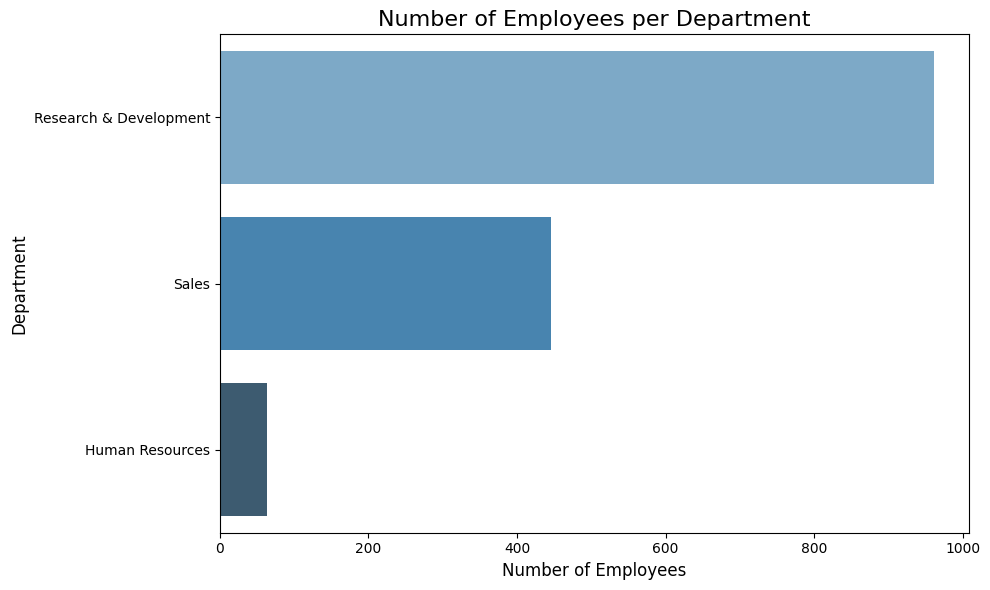

In [12]:


import matplotlib.pyplot as plt
import seaborn as sns


department_counts = df['Department'].value_counts().reset_index()
department_counts.columns = ['Department', 'Employee_Count']


plt.figure(figsize=(10,6))
sns.barplot(
    data=department_counts,
    x='Employee_Count',
    y='Department',
    palette='Blues_d'
)

plt.title("Number of Employees per Department", fontsize=16)
plt.xlabel("Number of Employees", fontsize=12)
plt.ylabel("Department", fontsize=12)

plt.tight_layout()


plt.savefig('department_barplot.png', dpi=300, bbox_inches='tight')


plt.show()



In [13]:

df_filtered = df[df['Department'].isin(['Sales', 'Research & Development'])]


In [14]:

cross_tab = pd.crosstab(df_filtered['JobSatisfaction'], df_filtered['Attrition'])
print(cross_tab)


Attrition         No  Yes
JobSatisfaction          
1                217   61
2                216   44
3                357   70
4                392   50


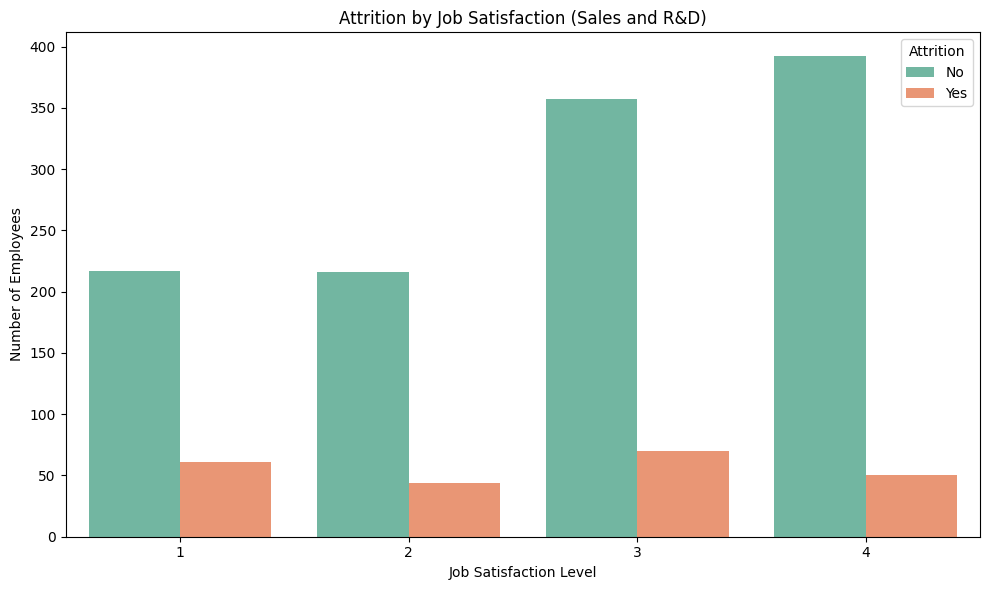

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10,6))
sns.countplot(
    data=df_filtered,
    x='JobSatisfaction',
    hue='Attrition',
    palette='Set2'
)

plt.title('Attrition by Job Satisfaction (Sales and R&D)')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()


In [16]:
df_filtered.groupby('JobSatisfaction')['Attrition'].value_counts(normalize=True).unstack()


Attrition,No,Yes
JobSatisfaction,,
1,0.780576,0.219424
2,0.830769,0.169231
3,0.836066,0.163934
4,0.886878,0.113122


In [17]:
df_filtered.groupby(['Department', 'JobSatisfaction'])['Attrition'].value_counts(normalize=True).unstack()


Attrition                                     No       Yes
Department             JobSatisfaction                    
Research & Development 1                0.802083  0.197917
                       2                0.862069  0.137931
                       3                0.856667  0.143333
                       4                0.905085  0.094915
Sales                  1                0.732558  0.267442
                       2                0.767442  0.232558
                       3                0.787402  0.212598
                       4                0.850340  0.149660

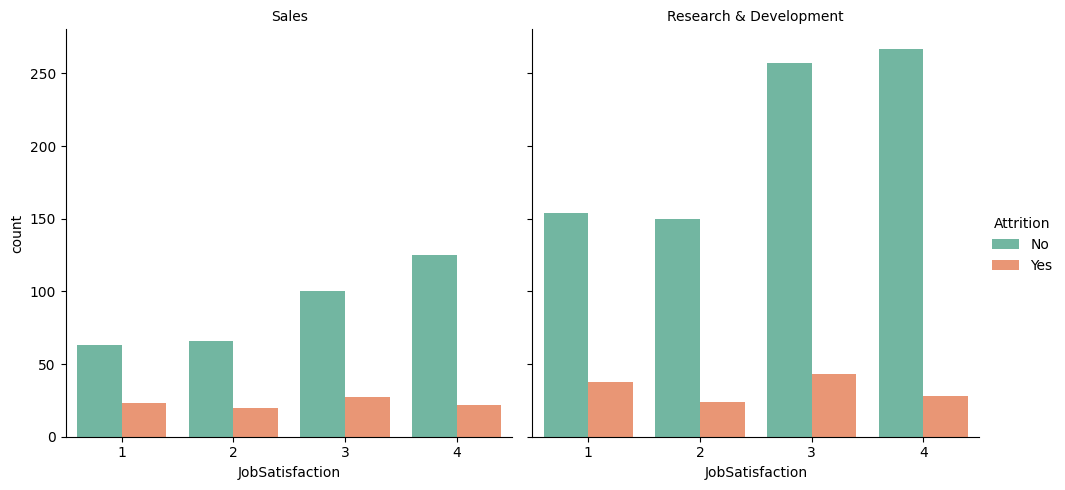

In [35]:
g = sns.catplot(
    data=df_filtered,
    x="JobSatisfaction",
    hue="Attrition",
    col="Department",
    kind="count",
    height=5,
    aspect=1,
    palette='Set2'
)
g.set_titles("{col_name}")
plt.show()


In [19]:
total_employees = df_filtered.groupby('Department')['EmployeeNumber'].count()


In [20]:
attrition_counts = df_filtered[df_filtered['Attrition'] == 'Yes'].groupby('Department')['EmployeeNumber'].count()


In [21]:
attrition_rate = (attrition_counts / total_employees) * 100
print(attrition_rate)


Department
Research & Development    13.839750
Sales                     20.627803
Name: EmployeeNumber, dtype: float64


In [22]:
overtime = df_filtered.groupby(['Department', 'OverTime']).size().unstack()
overtime_percent = overtime.div(overtime.sum(axis=1), axis=0) * 100
print(overtime_percent)


OverTime                       No        Yes
Department                                  
Research & Development  71.800208  28.199792
Sales                   71.300448  28.699552


/var/folders/st/fk1vq_zx1yx9fqx2l_llr7z80000gn/T/ipykernel_10530/4088492906.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


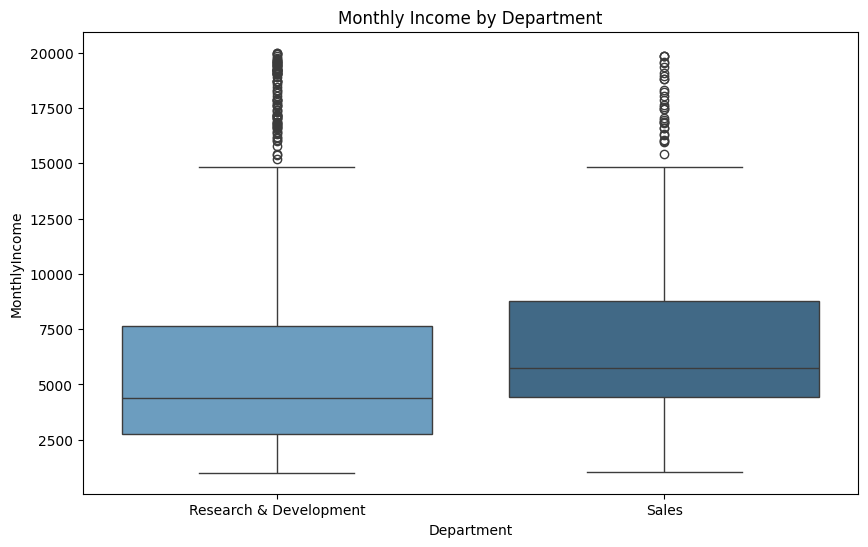

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df_filtered,
    x='Department',
    y='MonthlyIncome',
    palette='Blues_d',
    order=[ 'Research & Development','Sales' ]
)
plt.title('Monthly Income by Department')
plt.show()




In [24]:
overtime_table = pd.crosstab(df_filtered['Department'], df_filtered['OverTime'])
print(overtime_table)


OverTime                 No  Yes
Department                      
Research & Development  690  271
Sales                   318  128


In [25]:
overtime_percent = overtime_table.div(overtime_table.sum(axis=1), axis=0) * 100
print(overtime_percent)


OverTime                       No        Yes
Department                                  
Research & Development  71.800208  28.199792
Sales                   71.300448  28.699552


In [26]:
years_promo = df_filtered.groupby('Department')['YearsSinceLastPromotion'].mean()
print(years_promo)


Department
Research & Development    2.137357
Sales                     2.354260
Name: YearsSinceLastPromotion, dtype: float64


/var/folders/st/fk1vq_zx1yx9fqx2l_llr7z80000gn/T/ipykernel_10530/675684229.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='Department', y='YearsSinceLastPromotion', palette='Blues_d', order=['Research & Development', 'Sales'])


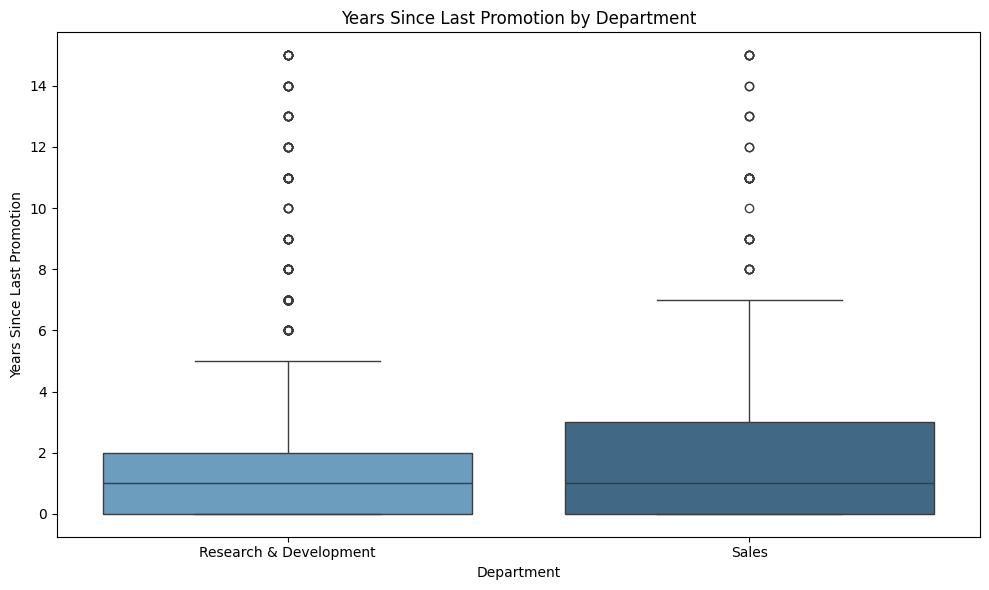

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(data=df_filtered, x='Department', y='YearsSinceLastPromotion', palette='Blues_d', order=['Research & Development', 'Sales'])
plt.title('Years Since Last Promotion by Department')
plt.xlabel('Department')
plt.ylabel('Years Since Last Promotion')
plt.tight_layout()
plt.show()


Attrition   No  Yes
Gender             
Female     501   87
Male       732  150


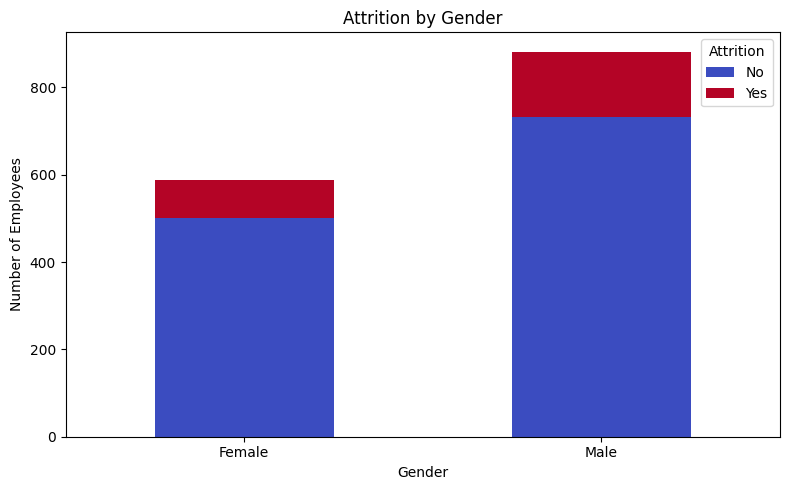

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Conteo de attrition por género
attrition_gender = df.groupby(['Gender', 'Attrition']).size().unstack()
print(attrition_gender)

# Gráfico de barras
attrition_gender.plot(kind='bar', stacked=True, figsize=(8,5), colormap='coolwarm')
plt.title('Attrition by Gender')
plt.ylabel('Number of Employees')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

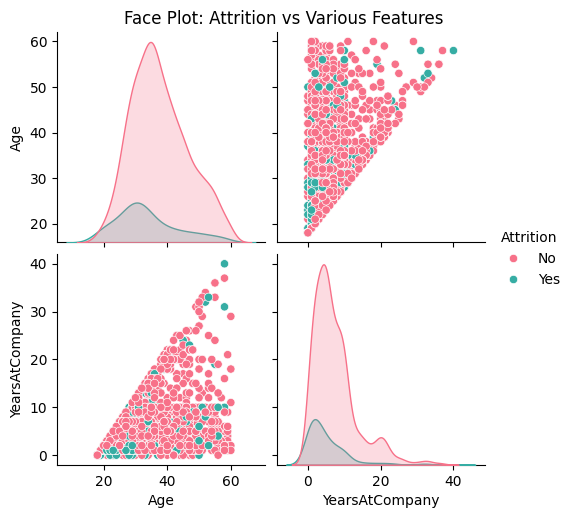

In [8]:
# Asegurar que 'Attrition' sea categórico
df['Attrition'] = df['Attrition'].astype('category')

# Seleccionar algunas variables numéricas
features = ['Age', 'YearsAtCompany', ]
sns.pairplot(df, hue='Attrition', vars=features, palette='husl')
plt.suptitle('Face Plot: Attrition vs Various Features', y=1.02)
plt.show()